In [15]:
import pandas as pd

import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
crawled_data_path = '인공지능_문화체육관광부_클라썸_crawled.csv'
crawled_data = pd.read_csv(crawled_data_path)

In [17]:
business_top_path = 'results/v2/top_scored_business_news_for_query.csv'
org_tops_path = 'results/v2/list_of_top_scored_org_news_for_query_by_org.csv'
result_path = 'results/v2/top_5_orgs_and_their_news_for_top_scored_business_news.csv'
business_top = pd.read_csv(business_top_path)
org_tops = pd.read_csv(org_tops_path)
result = pd.read_csv(result_path)

In [18]:
result = result[['crawling_trg', 'content', 'score']]

In [20]:
result

,crawling_trg,content,score
0,국립중앙박물관 인공지능,"국립국어원 '인공지능 언어 능력' 평가 대회 국립중앙박물관 어린이박물관, 데굴데굴 ...",0.539980
1,한국관광공사 인공지능,한국관광공사 '관광데이터 AI 경진대회’ 관광지 유형별 자동 분류 AI 알고리즘 아...,0.514386
2,한국콘텐츠진흥원 인공지능,펭수 인기부터 포켓몬빵 열풍까지...캐릭터 시대88올림픽 호돌이부터 2000년대 뽀...,0.495655
3,대한체육회 인공지능,2023년 개장 목표 … 대한체육회와 76억 투입속초시 노학동 척산체육관에 2030...,0.469813
4,국립한글박물관 인공지능,와이즈넛은 6~9일 국립한글박물관에서 진행되는 '2022 세계 한국어 한마당 - 한...,0.447286


In [21]:
result.score.tolist()

[0.53997976, 0.51438594, 0.4956552, 0.4698125, 0.44728613]

In [22]:
import matplotlib.font_manager as fm
font_location = 'fonts/NanumMyeongjo.ttf'

In [23]:
fm.fontManager.addfont(path=font_location)

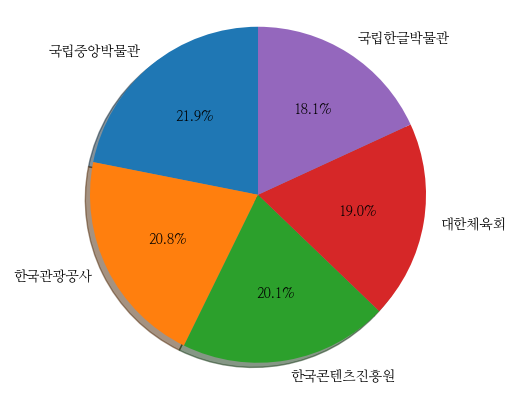

In [24]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = result.crawling_trg.apply(lambda x: x.split()[0]).tolist()
sizes = result.score.tolist()
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

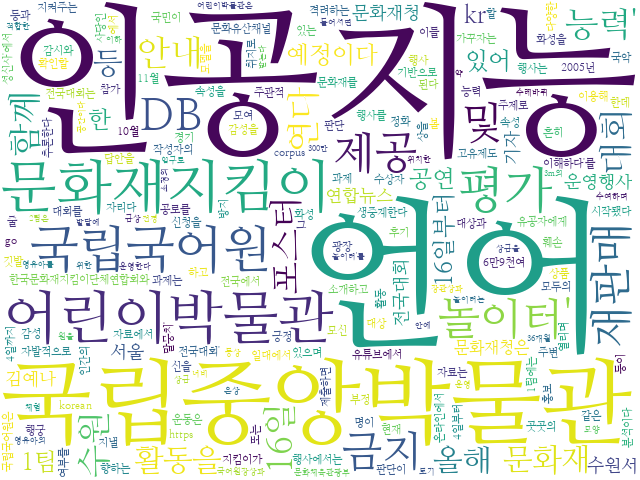

In [54]:
text = result.content.iloc[0]

wordcloud = WordCloud(
    font_path='fonts/NanumMyeongjo.ttf', 
    width=640, 
    height=480, 
    stopwords=['수', '데굴데굴', '있다'], 
    collocations=False, 
    background_color='white', 
    mode='RGBA', # ["1", "CMYK", "F", "HSV", "I", "L", "LAB", "P", "RGB", "RGBA", "RGBX", "YCbCr"]
    ).generate(text)
image = wordcloud.to_image()
image.show()

In [ ]:
path.dirname(__file__) if "__file__" in locals() else os.getcwd()